___


# ML Project : Predict Loan Eligibility 
___

https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/?utm_source=auto-email#ProblemStatement

## Data 
<div class="alert alert-block alert-info"> 
    Description of each variable:
</div>

- Loan_ID : Unique loan id  
- Gender : Male/Female   
- Married : Applicant married (y/n)   
- Dependents : number of dependents   
- Education : Graduate/Under Graduate  
- Self_Employed : sef employed (y/n)   
- ApplicantIncome : applicant income  
- CoapplicantIncome : coapplicant income  
- LoanAmount  : loan amount in thousands
- Loan_Amount_Term : term of loan in months
- Credit_History : credit history meets guidelines 
- Property_Area :Urban/Semi Urban/ Rural 
- `Loan_Status` : Loan approved (y/n)

***The main objective for this dataset:***  
Using machine learning techniques to predict loan payments.

## Loading packages

In [2]:
import pandas as pd
import numpy as np              # For mathematical calculations
import seaborn as sns           # For data visualization 
import matplotlib.pyplot as plt # For plotting graphs
%matplotlib inline
print('Pandas version        : {}'.format(pd.__version__))
print('Numpy version         : {}'.format(np.__version__))
print('Seaborn version       : {}'.format(sns.__version__))

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings                  # To ignore any warning
warnings.filterwarnings("ignore")
# sckit learn 

Pandas version        : 1.2.4
Numpy version         : 1.20.1
Seaborn version       : 0.11.1


## Reading Data 

In [11]:
# read in csv file as a DataFram
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')
train_original = train.copy()
test_original = test.copy()
# Size of each data set:
print("Train set has {} entries and {} features".format(*train.shape))
print("Test set has {} entries and {} features".format(*test.shape))

Train set has 614 entries and 13 features
Test set has 367 entries and 12 features


In [12]:
# explore the first 5 rows of the train set 
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
# explore the first 5 rows of the test set 
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Exploratory Data Analysis

In [14]:
#column information
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
#summary statistics
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
#the Id column is not needed, let's drop it for both test and train datasets
train.drop('Loan_ID',axis=1,inplace=True)
test.drop('Loan_ID',axis=1,inplace=True)
#checking the new shapes
print(f"training set (entries, col): {train.shape}\ntesting set (entries, col): {test.shape}")

training set (entries, col): (614, 12)
testing set (entries, col): (367, 11)


In [34]:
# the target 
target = 'Loan_Status'
#list of all the numeric columns
numerical_features = train.select_dtypes('number').columns.to_list()
#list of all the categoric columns
categorical_features = list(set(train.select_dtypes('object').columns.to_list()) - set([target]))
categorical_features

['Self_Employed',
 'Property_Area',
 'Married',
 'Gender',
 'Dependents',
 'Education']

Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:title={'center':'Loan_Status'}>

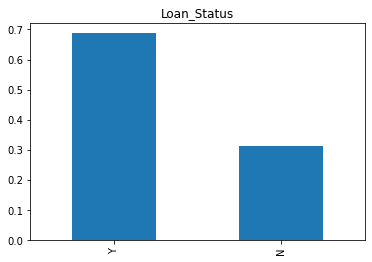

In [29]:
# Loan status distribution In percentage
print(train[target].value_counts())
train[target].value_counts(normalize=True).plot.bar(title=target)

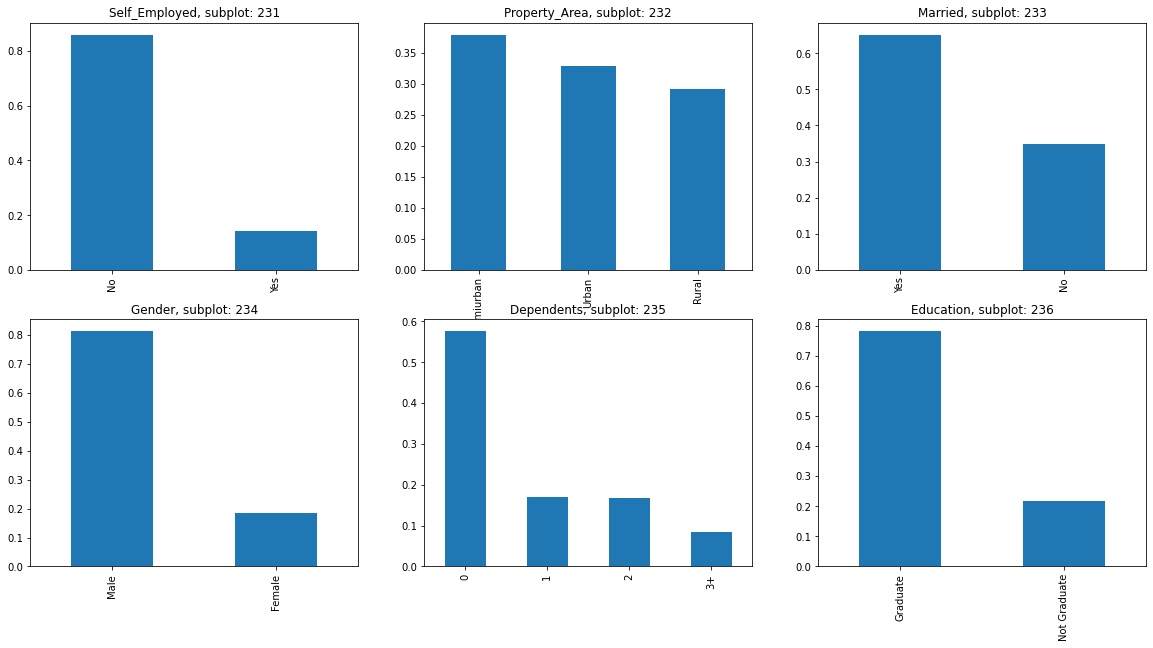

In [37]:
# Plotting cat features 
fig = plt.figure(figsize=(20,10))
a,b,c = 2,3,1
for feature in categorical_features:
    plt.subplot(a, b, c)
    #plt.title('{}, subplot: {}{}{}'.format(feature, a, b, c))
    train[feature].value_counts(normalize=True).plot.bar(title='{}, subplot: {}{}{}'.format(feature, a, b, c) )
    c = c + 1
plt.show()

***Observations :***
* 80% applicants in the train data re males
* Around 70% of the applicants are married
* Around 15% of the applicants are self employed 
* Around 85% applicants have repaid their debts
* Most of the applicants don't have any dependents
* Around 80% of the applicants are graduate
* Most of the appliacnts are from  Semiurban area

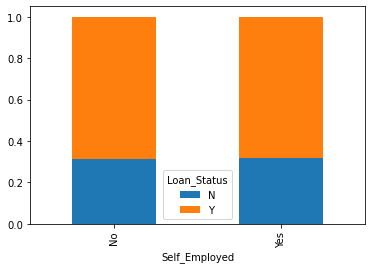

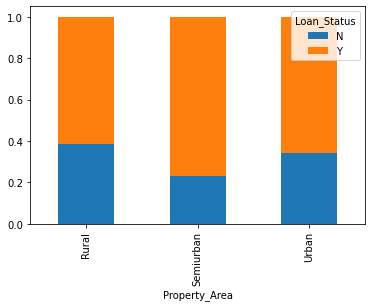

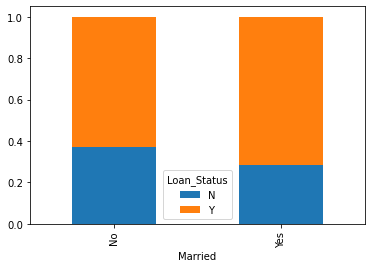

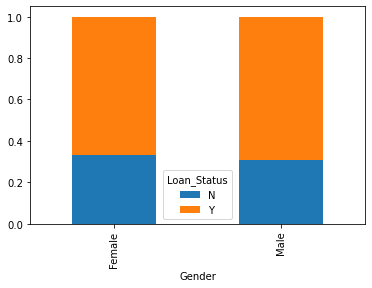

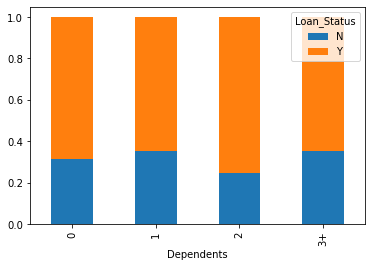

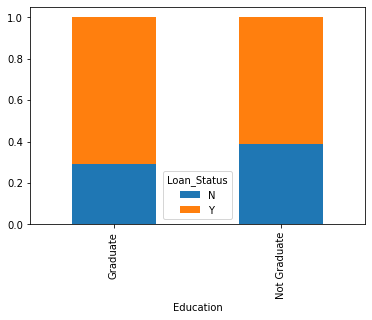

In [44]:
for feature in categorical_features :
    crostab=pd.crosstab(train[feature],train[target] )
    crostab.div(crostab.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)

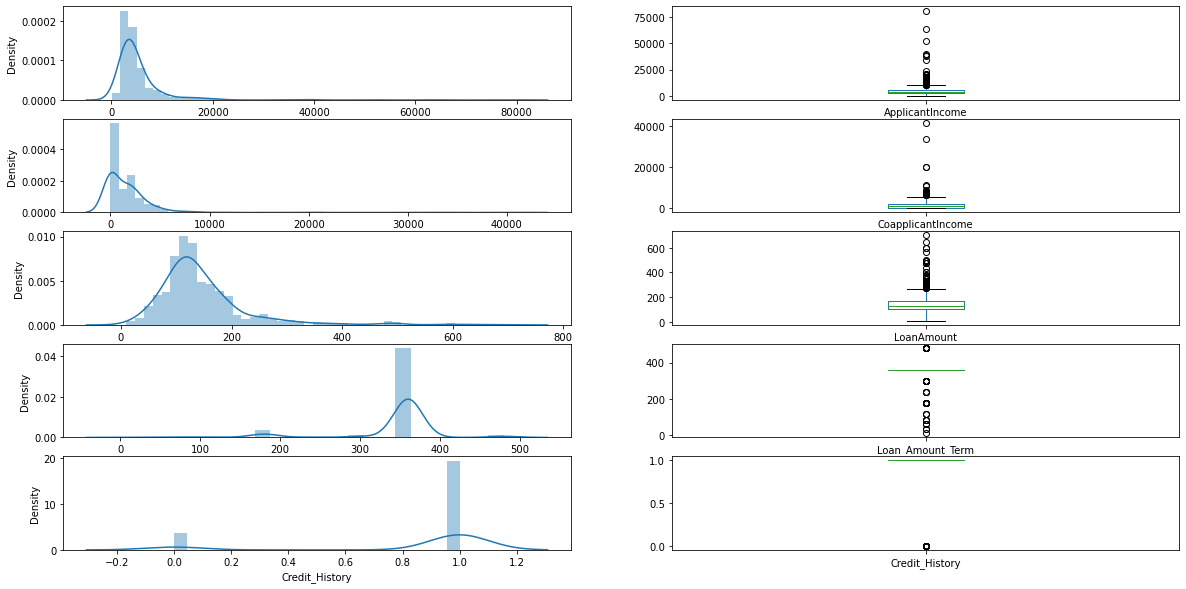

In [31]:
# Plotting num features 
fig = plt.figure(figsize=(20,10))
a,b,c = len(numerical_features),2,1
for feature in numerical_features:
    plt.subplot(a, b, c)
    #plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    sns.distplot(train[feature])
    c = c + 1
    
    plt.subplot(a, b, c)
    #plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    train[feature].plot.box()
    #plt.boxplot(x = train)
    c = c + 1
plt.show()

***Observations :***
* For numerical variables, there are lot of outliers
* Some anormal distribution 
* Credit history maybe 

## Handling missing values
As you can see we have some missing data, let's have a look how many we have for each column:

In [39]:
#missing values in decsending order
print("Number of missing values before imputation :")
train.isnull().sum().sort_values(ascending=False)

Number of missing values before imputation :


Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [48]:
# Now we will try to handle with the missing values
miss_cols=["Credit_History","Self_Employed", "Married" ,"Gender" ,"Loan_Amount_Term",
           "Dependents","LoanAmount"  ]
# Filling using the most frequent value (mode).
for feature in miss_cols :
    train[feature] = train[feature].fillna(train[feature].dropna().mode().values[0] ) 
    test[feature] = test[feature].fillna(test[feature].dropna().mode().values[0] )   
    

#missing values in decsending order After imputation
print("Number of missing values after imputation :")
train.isnull().sum().sort_values(ascending=False)

Number of missing values after imputation :


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
test.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### converting categorical values to numbers

In [51]:
#converting categorical values to numbers
to_numeric = {'Male': 1, 'Female': 2,'Yes': 1, 'No': 2,'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,'Y': 1, 'N': 0,'3+': 3}

In [65]:
train = train.applymap(lambda label: to_numeric.get(label) 
                       if label in to_numeric else label)
test = test.applymap(lambda label: to_numeric.get(label) 
                       if label in to_numeric else label)
#  convertind the Dependents column
train["Dependents"] = pd.to_numeric(train.Dependents)
test["Dependents"] = pd.to_numeric(test.Dependents)
print("Train set has {} entries and {} features".format(*train.shape))
print("Test set has {} entries and {} features".format(*test.shape))
train.dtypes
test.info()

Train set has 614 entries and 12 features
Test set has 367 entries and 11 features
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 31.7 KB


In [59]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,3,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1


<AxesSubplot:>

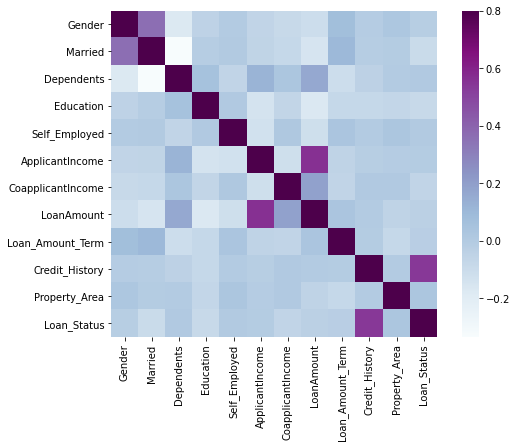

In [66]:
# matrix of correlation
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6) )
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")
# matwith more details
#matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

***Observations :***
* Most corrolated var are : `ApplicantIcome` - `LoanAmount` and `Credit_History` - `Loan_Status`
* `CoapplicantIncome` and `LoanAmount` are corrolated 

## Building Machine learning models

***Models we will use:***
* Decision Tree
* Random Forest
* XGBoost
* Logistic Regression

In [68]:
# -- drop the target : split into X and Y
y = train.Loan_Status 
X = train.drop(target,1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,3
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3


In [70]:
# split train data into train set et val set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape

(429, 11)

### Decision Tree

In [77]:
#### Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_pred_dt = DT.predict(X_val)

#  prediction Summary by species
print(classification_report(y_val, y_pred_dt))

# Accuracy score
DT_SC = accuracy_score(y_val,y_pred_dt)
print(f"{round(DT_SC*100,2)}% Accurate")


              precision    recall  f1-score   support

           0       0.46      0.53      0.49        51
           1       0.81      0.76      0.78       134

    accuracy                           0.70       185
   macro avg       0.63      0.65      0.64       185
weighted avg       0.71      0.70      0.70       185

69.73% Accurate


In [80]:
Decision_Tree=pd.DataFrame({'y_test':y_val,'prediction':y_pred_dt})
Decision_Tree.head()

,y_test,prediction
454,1,0
52,0,1
536,1,1
469,0,0
55,1,1


### Random Forest

In [90]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_pred_rf= RF.predict(X_val)

#  prediction Summary by species
print(classification_report(y_val, y_pred_rf))

# Accuracy score
RF_SC = accuracy_score(y_val,y_pred_rf)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.67      0.43      0.52        51
           1       0.81      0.92      0.86       134

    accuracy                           0.78       185
   macro avg       0.74      0.67      0.69       185
weighted avg       0.77      0.78      0.77       185

78.38% Accurate


In [91]:
Random_Forest=pd.DataFrame({'y_test':y_val,'prediction':y_pred_rf})
Random_Forest.head()

,y_test,prediction
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1


### XGBoost 

In [94]:
XGB = XGBClassifier(eval_metric="logloss")
XGB.fit(X_train, y_train)

y_pred_xgb = XGB.predict(X_val)

#  prediction Summary by species
print(classification_report(y_val, y_pred_xgb))

# Accuracy score
XGB_SC = accuracy_score(y_val,y_pred_xgb)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.65      0.55      0.60        51
           1       0.84      0.89      0.86       134

    accuracy                           0.79       185
   macro avg       0.74      0.72      0.73       185
weighted avg       0.79      0.79      0.79       185

79.46% Accurate


In [96]:
XGBoost=pd.DataFrame({'y_test':y_val,'prediction':y_pred_xgb})
XGBoost.head()    

,y_test,prediction
454,1,0
52,0,1
536,1,1
469,0,0
55,1,1


### Logistic Regression

In [97]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_pred_lr = LR.predict(X_val)

#  prediction Summary by species
print(classification_report(y_val, y_pred_lr))

# Accuracy score
LR_SC = accuracy_score(y_val,y_pred_lr)
print('accuracy is',accuracy_score(y_val,y_pred_lr))
print(f"{round(LR_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

accuracy is 0.8324324324324325
83.24% Accurate


In [98]:
Logistic_Regression=pd.DataFrame({'y_test':y_val,'prediction':y_pred_lr})
Logistic_Regression.head()    

,y_test,prediction
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1


## Conclusion 
***The `Logistic Regression`algorithm is the most accurate: approximately 83%.***


In [100]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'Models': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Models,Score
3,Logistic Regression,0.832432
2,XGBoost,0.794595
1,Random Forest,0.783784
0,Decision Tree,0.697297


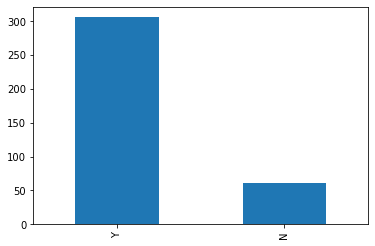

In [101]:
# Load submission data 
submission = pd.read_csv("sample_submission_49d68Cx.csv")
submission.head()
# Make prediction on test set
pred_test = LR.predict(test)
submission["Loan_Status"] = pred_test
submission["Loan_ID"] = test_original["Loan_ID"]
submission[target].replace(0,'N',inplace=True)
submission[target].replace(1,'Y',inplace=True)
submission[target].value_counts().plot.bar()
submission.to_csv('lgr_solution.csv',index=False)
#submission.to_csv('xgb_solution.csv',index=False)